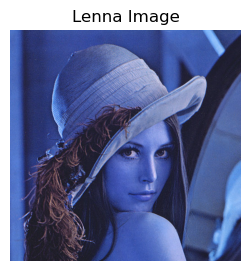

In [21]:
#image processing
import cv2 as c
import matplotlib.pyplot as plt
import numpy as np
img=c.imread("lena.bmp")
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title('Lenna Image')
plt.axis('off')
plt.show()

In [22]:
img

array([[[ 74, 111, 193],
        [ 79, 116, 198],
        [ 76, 113, 195],
        ...,
        [ 55,  78, 146],
        [ 55,  78, 146],
        [ 55,  78, 146]],

       [[ 77, 114, 196],
        [ 78, 115, 197],
        [ 75, 112, 194],
        ...,
        [ 57,  80, 148],
        [ 57,  80, 148],
        [ 57,  80, 148]],

       [[ 78, 115, 199],
        [ 76, 107, 192],
        [ 77, 117, 200],
        ...,
        [ 54,  80, 150],
        [ 54,  80, 147],
        [ 55,  79, 145]],

       ...,

       [[ 61,  88, 168],
        [ 63,  90, 170],
        [ 65,  95, 174],
        ...,
        [ 37,  39,  69],
        [ 36,  38,  69],
        [ 38,  40,  71]],

       [[ 61,  86, 166],
        [ 62,  89, 169],
        [ 64,  91, 171],
        ...,
        [ 36,  38,  68],
        [ 36,  38,  68],
        [ 39,  41,  71]],

       [[ 55,  81, 158],
        [ 62,  88, 165],
        [ 62,  90, 167],
        ...,
        [ 36,  39,  67],
        [ 38,  41,  71],
        [ 44,  46,  76]]

In [25]:
height, width, channels = img.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")

Height: 512, Width: 512, Channels: 3


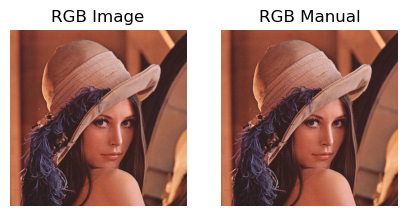

In [27]:
#library 
img_color=c.cvtColor(img,c.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(img_color)
plt.title("RGB Image")
plt.axis('off')
#manual
img_man=img[:,:,[2,1,0]]
plt.subplot(1,2,2)
plt.imshow(img_man)
plt.title("RGB Manual")
plt.axis("off")
plt.show()

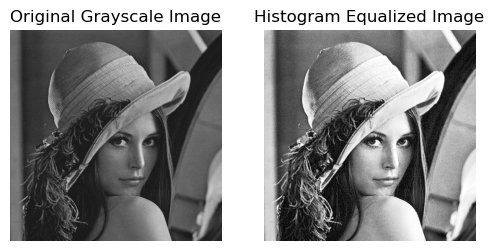

In [28]:
img_gy=c.cvtColor(img,c.COLOR_RGB2GRAY)
img_eq = c.equalizeHist(img_gy)
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.imshow(img_gy, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()

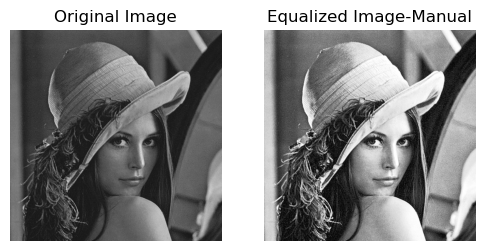

In [30]:
#histrogram equalisation manual
histogram = np.bincount(img_gy.flatten(), minlength=256)
cdf = histogram.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')
equalized_image = cdf_normalized[img_gy]
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gy, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image-Manual")
plt.axis("off")

plt.show()

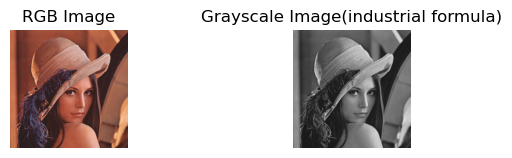

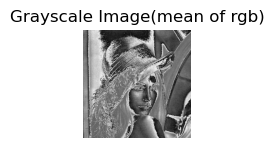

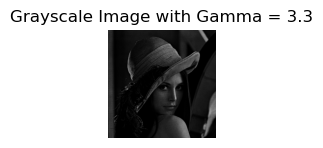

In [32]:
#constant
R = img_color[..., 0]
G = img_color[..., 1]
B = img_color[..., 2]
gray_manual = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
plt.figure(figsize=(7,7))
plt.subplot(1, 4, 1)
plt.imshow(img_color)
plt.title("RGB Image")
plt.axis('off') 
plt.subplot(1, 4, 3)
plt.imshow(gray_manual, cmap='gray')
plt.title("Grayscale Image(industrial formula)")
plt.axis('off') 
plt.show()  
#mean of rgb
import warnings
warnings.filterwarnings("ignore")
img_gray = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        R = img_color[i, j, 0] 
        G = img_color[i, j, 1]  
        B = img_color[i, j, 2] 
        gray_value = (R + G + B)//3   
        img_gray[i, j] = gray_value
plt.subplot(1, 4, 3)        
plt.imshow(img_gray,cmap='gray')
plt.title("Grayscale Image(mean of rgb)")
plt.axis('off') 
plt.show() 
#gamma method
image_gray = np.zeros((height, width), dtype=np.uint8)
gamma=3.3
for i in range(height):
    for j in range(width):
        R = img_color[i, j, 0] 
        G = img_color[i, j, 1] 
        B = img_color[i, j, 2] 
        R_gamma = 255 * (R / 255) ** gamma
        G_gamma = 255 * (G / 255) ** gamma
        B_gamma = 255 * (B / 255) ** gamma
        gray_value = (R_gamma + G_gamma + B_gamma) // 3
        image_gray[i, j] = gray_value 
plt.subplot(1,4,4)
plt.imshow(image_gray, cmap='gray')
plt.title(f"Grayscale Image with Gamma = {gamma}")
plt.axis('off')
plt.show()

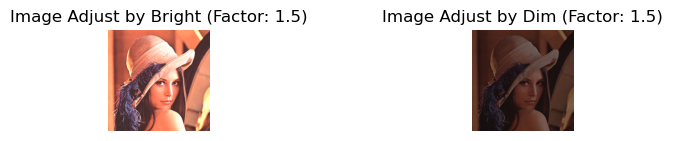

In [34]:
brightness_factor = 0.5
img_brightness_adjusted = img_color * brightness_factor
img_brightness_adjusted = np.clip(img_brightness_adjusted, 0, 255)
brightness_factor = 1.5 
img_brightness_adjusted_dim = img_color * brightness_factor
img_brightness_adjusted_dim = np.clip(img_brightness_adjusted_dim, 0, 255)
plt.figure(figsize=(6,6))
plt.subplot(1,4,1)
plt.imshow(img_brightness_adjusted_dim.astype(np.uint8))
plt.title(f"Image Adjust by Bright (Factor: {brightness_factor})")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_brightness_adjusted.astype(np.uint8))
plt.title(f"Image Adjust by Dim (Factor: {brightness_factor})")
plt.axis('off')
plt.show()

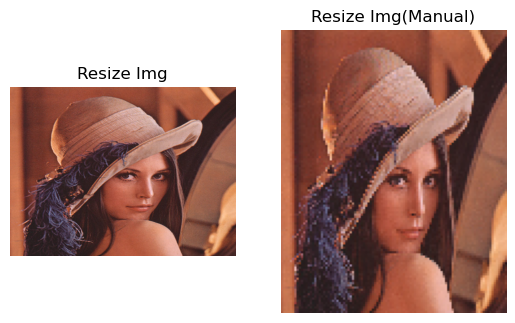

In [35]:
#resize
new_size = (400, 300) 
img_resized = c.resize(img_man, new_size)
plt.subplot(1,2,1)
plt.imshow(img_resized)
plt.title("Resize Img")
plt.axis('off')
#resize manual
img_resized_manual = c.resize(img_color,(int(img_color.shape[1]/5),int(img_color.shape[0]/4)))
plt.subplot(1,2,2)
plt.imshow(img_resized_manual)
plt.title("Resize Img(Manual)")
plt.axis('off')
plt.show()

In [36]:
img_resized

array([[[194, 112,  76],
        [196, 114,  77],
        [195, 112,  76],
        ...,
        [146,  78,  55],
        [147,  79,  56],
        [147,  79,  56]],

       [[198, 114,  78],
        [195, 111,  76],
        [198, 114,  78],
        ...,
        [149,  79,  53],
        [148,  80,  54],
        [145,  79,  55]],

       [[199, 115,  80],
        [197, 113,  77],
        [198, 114,  79],
        ...,
        [154,  82,  57],
        [151,  83,  58],
        [146,  80,  57]],

       ...,

       [[167,  86,  59],
        [178,  97,  68],
        [181, 100,  70],
        ...,
        [ 70,  39,  39],
        [ 71,  40,  38],
        [ 71,  40,  38]],

       [[168,  88,  61],
        [172,  92,  64],
        [178,  98,  68],
        ...,
        [ 70,  40,  40],
        [ 69,  38,  36],
        [ 71,  40,  38]],

       [[162,  83,  58],
        [167,  89,  62],
        [176,  98,  70],
        ...,
        [ 68,  40,  39],
        [ 69,  39,  37],
        [ 73,  44,  41]]

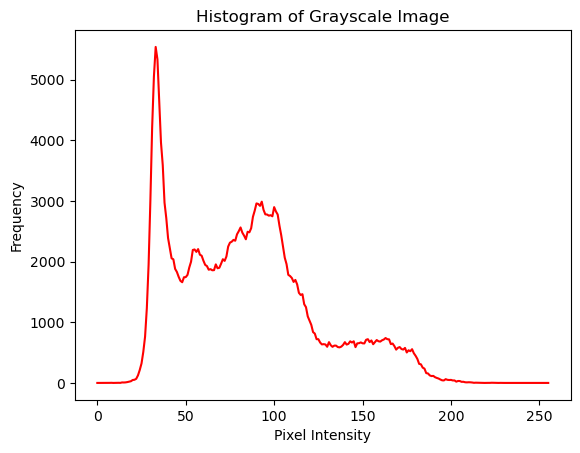

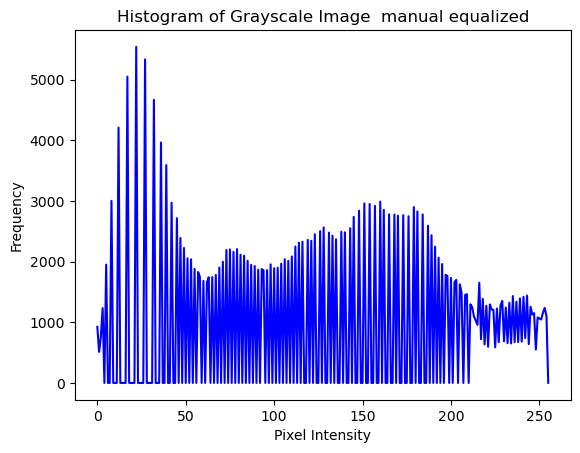

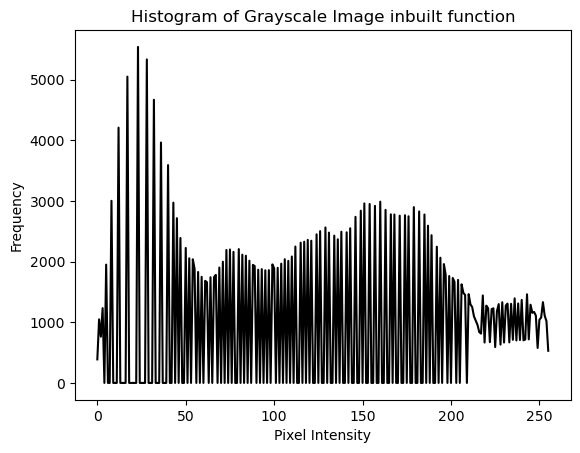

In [37]:
hist=c.calcHist([img_gy],[0],None,[256],[0,256])
plt.plot(hist,color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
hist_ma=c.calcHist([equalized_image],[0],None,[256],[0,256])
plt.plot(hist_ma,color="blue")
plt.title("Histogram of Grayscale Image  manual equalized")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
hist_in=c.calcHist([img_eq],[0],None,[256],[0,256])
plt.plot(hist_in,color='black')
plt.title("Histogram of Grayscale Image inbuilt function")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


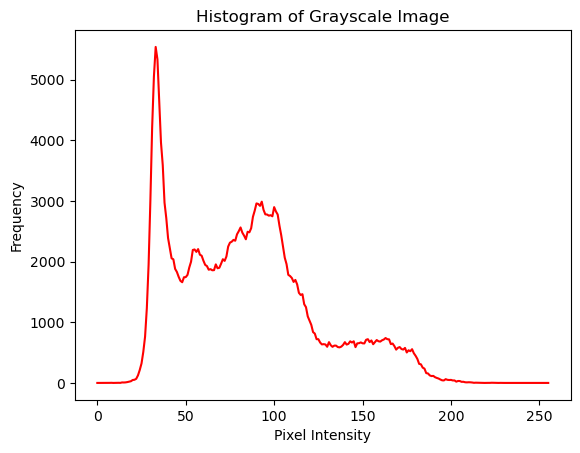

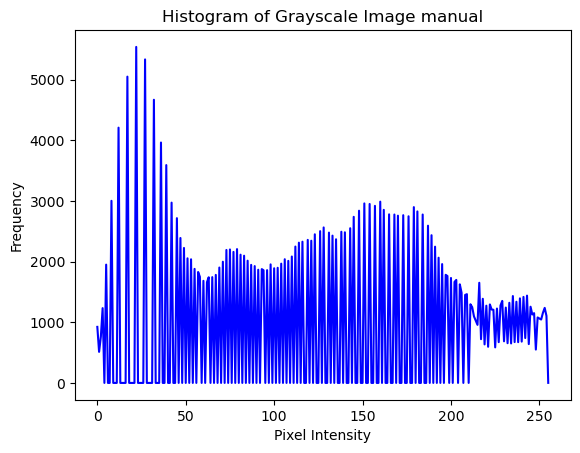

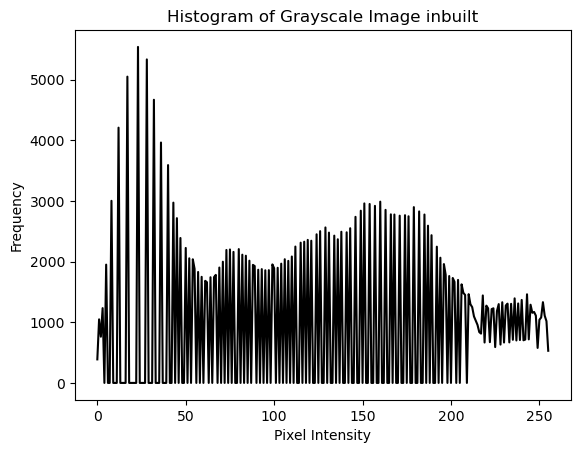

In [38]:
hist, bins = np.histogram(img_gy.flatten(), bins=256, range=(0, 256))
plt.plot(hist,color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
equalized_hist,_= np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
plt.plot(equalized_hist,color='blue')
plt.title("Histogram of Grayscale Image manual")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
eq_hist,_= np.histogram(img_eq.flatten(), bins=256, range=(0, 256))
plt.plot(eq_hist,color='black')
plt.title("Histogram of Grayscale Image inbuilt")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


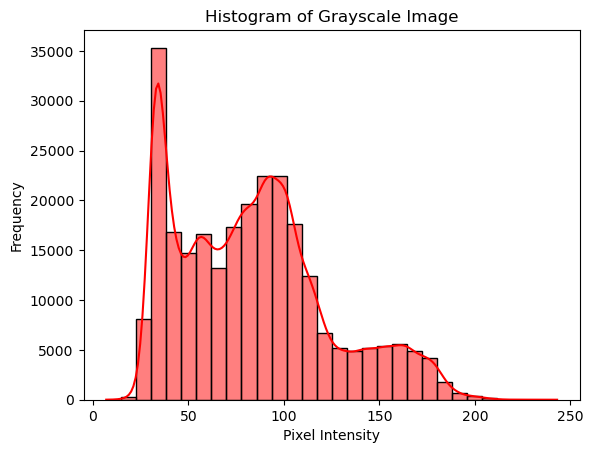

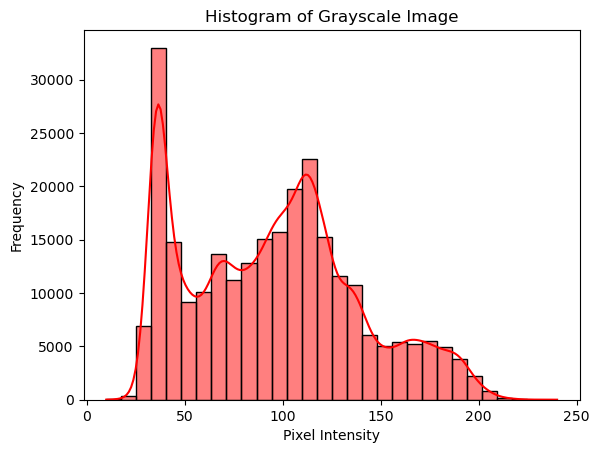

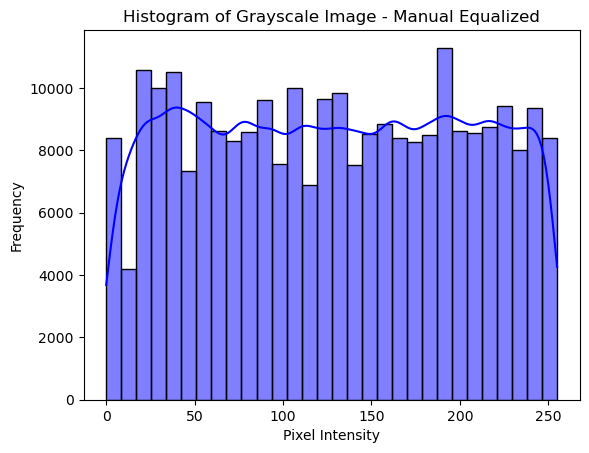

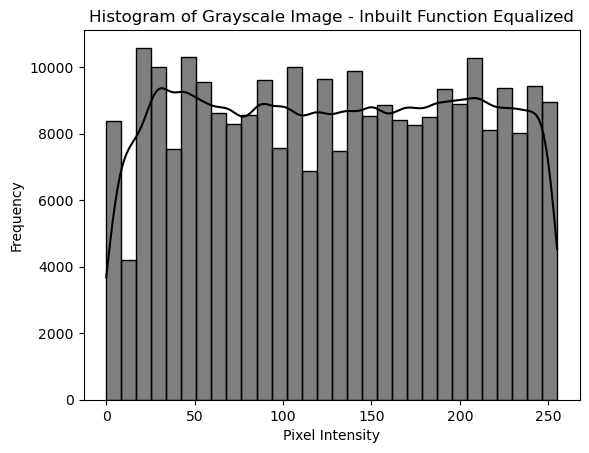

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.histplot(img_gy.ravel(), kde=True, bins=30, color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(gray_manual.ravel(), kde=True, bins=30, color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(equalized_image.ravel(), kde=True, bins=30, color='blue')
plt.title("Histogram of Grayscale Image - Manual Equalized")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


sns.histplot(img_eq.ravel(), kde=True, bins=30, color='black')
plt.title("Histogram of Grayscale Image - Inbuilt Function Equalized")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


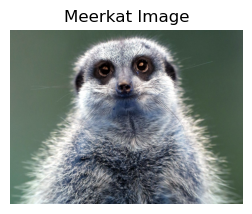

In [40]:
#image processing
import cv2 as c
import matplotlib.pyplot as plt
import numpy as np
img=c.imread("len_hyna.jpg")
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.title('Meerkat Image')
plt.axis('off')
plt.show()

In [41]:
height, width, channels = img.shape
print(f"Height: {height}, Width: {width}, Channels: {channels}")

Height: 960, Width: 1280, Channels: 3


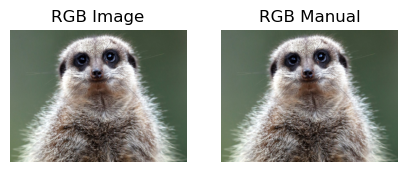

In [42]:
#library 
img_color=c.cvtColor(img,c.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(img_color)
plt.title("RGB Image")
plt.axis('off')
#manual
img_man=img[:,:,[2,1,0]]
plt.subplot(1,2,2)
plt.imshow(img_man)
plt.title("RGB Manual")
plt.axis("off")
plt.show()

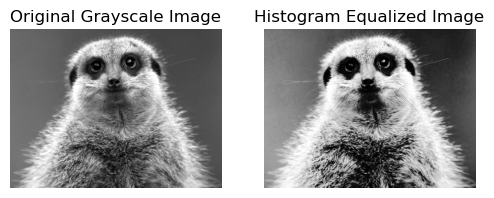

In [43]:
img_gy=c.cvtColor(img,c.COLOR_RGB2GRAY)
img_eq = c.equalizeHist(img_gy)
plt.figure(figsize=(6,6))
plt.subplot(1, 2, 1)
plt.imshow(img_gy, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')
plt.show()


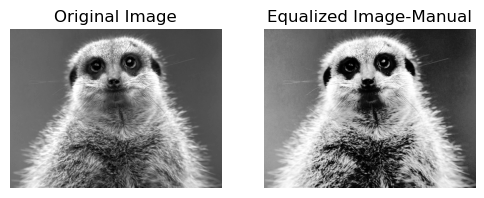

In [44]:
#histrogram equalisation manual
histogram = np.bincount(img_gy.flatten(), minlength=256)
cdf = histogram.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
cdf_normalized = cdf_normalized.astype('uint8')
equalized_image = cdf_normalized[img_gy]
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_gy, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image-Manual")
plt.axis("off")

plt.show()

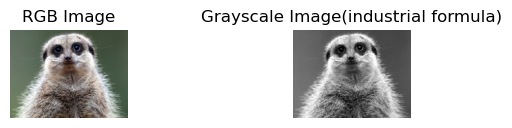

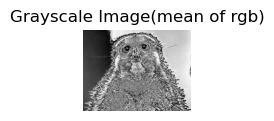

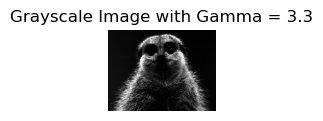

In [45]:
#constant
R = img_color[..., 0]
G = img_color[..., 1]
B = img_color[..., 2]
gray_manual = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)
plt.figure(figsize=(7,7))
plt.subplot(1, 4, 1)
plt.imshow(img_color)
plt.title("RGB Image")
plt.axis('off') 
plt.subplot(1, 4, 3)
plt.imshow(gray_manual, cmap='gray')
plt.title("Grayscale Image(industrial formula)")
plt.axis('off') 
plt.show()  
#mean of rgb
import warnings
warnings.filterwarnings("ignore")
img_gray = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        R = img_color[i, j, 0] 
        G = img_color[i, j, 1]  
        B = img_color[i, j, 2] 
        gray_value = (R + G + B)//3   
        img_gray[i, j] = gray_value
plt.subplot(1, 4, 3)        
plt.imshow(img_gray,cmap='gray')
plt.title("Grayscale Image(mean of rgb)")
plt.axis('off') 
plt.show() 
#gamma method
image_gray = np.zeros((height, width), dtype=np.uint8)
gamma=3.3
for i in range(height):
    for j in range(width):
        R = img_color[i, j, 0] 
        G = img_color[i, j, 1] 
        B = img_color[i, j, 2] 
        R_gamma = 255 * (R / 255) ** gamma
        G_gamma = 255 * (G / 255) ** gamma
        B_gamma = 255 * (B / 255) ** gamma
        gray_value = (R_gamma + G_gamma + B_gamma) // 3
        image_gray[i, j] = gray_value 
plt.subplot(1,4,4)
plt.imshow(image_gray, cmap='gray')
plt.title(f"Grayscale Image with Gamma = {gamma}")
plt.axis('off')
plt.show()

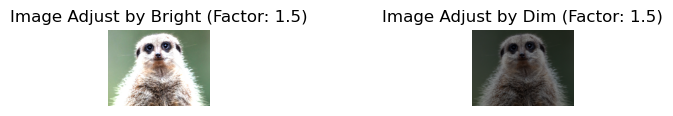

In [46]:
brightness_factor = 0.5
img_brightness_adjusted = img_color * brightness_factor
img_brightness_adjusted = np.clip(img_brightness_adjusted, 0, 255)
brightness_factor = 1.5 
img_brightness_adjusted_dim = img_color * brightness_factor
img_brightness_adjusted_dim = np.clip(img_brightness_adjusted_dim, 0, 255)
plt.figure(figsize=(6,6))
plt.subplot(1,4,1)
plt.imshow(img_brightness_adjusted_dim.astype(np.uint8))
plt.title(f"Image Adjust by Bright (Factor: {brightness_factor})")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(img_brightness_adjusted.astype(np.uint8))
plt.title(f"Image Adjust by Dim (Factor: {brightness_factor})")
plt.axis('off')
plt.show()

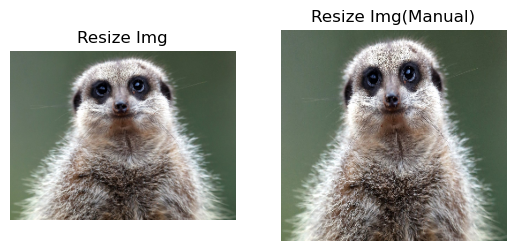

In [47]:
#resize
new_size = (400, 300) 
img_resized = c.resize(img_man, new_size)
plt.subplot(1,2,1)
plt.imshow(img_resized)
plt.title("Resize Img")
plt.axis('off')
#resize manual
img_resized_manual = c.resize(img_color,(int(img_color.shape[1]/5),int(img_color.shape[0]/4)))
plt.subplot(1,2,2)
plt.imshow(img_resized_manual)
plt.title("Resize Img(Manual)")
plt.axis('off')
plt.show()

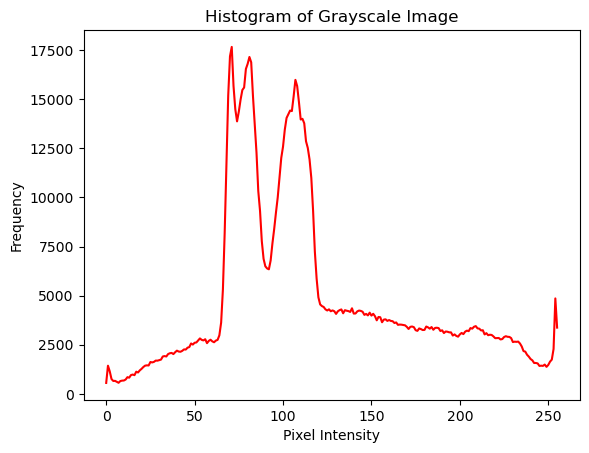

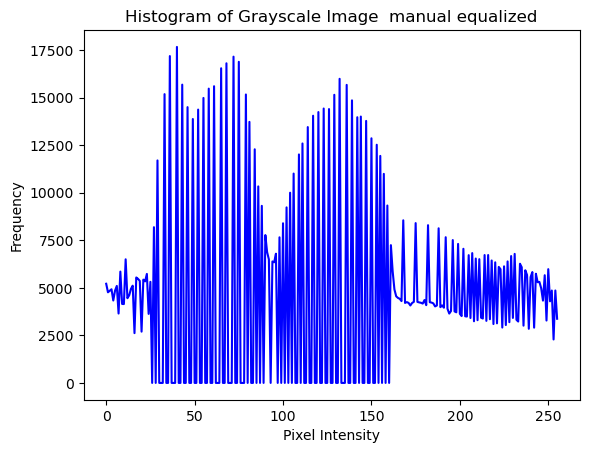

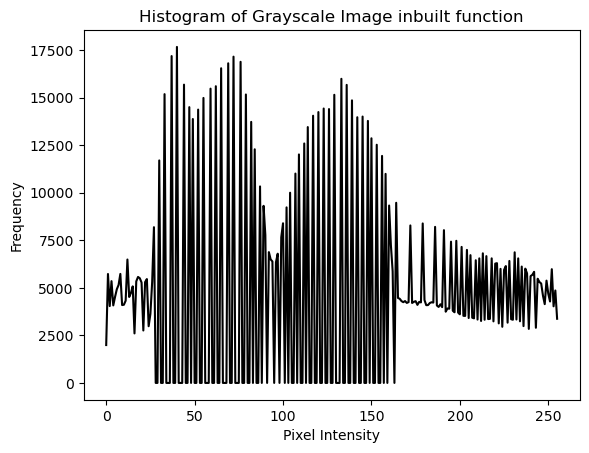

In [48]:
hist=c.calcHist([img_gy],[0],None,[256],[0,256])
plt.plot(hist,color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
hist_ma=c.calcHist([equalized_image],[0],None,[256],[0,256])
plt.plot(hist_ma,color="blue")
plt.title("Histogram of Grayscale Image  manual equalized")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
hist_in=c.calcHist([img_eq],[0],None,[256],[0,256])
plt.plot(hist_in,color='black')
plt.title("Histogram of Grayscale Image inbuilt function")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


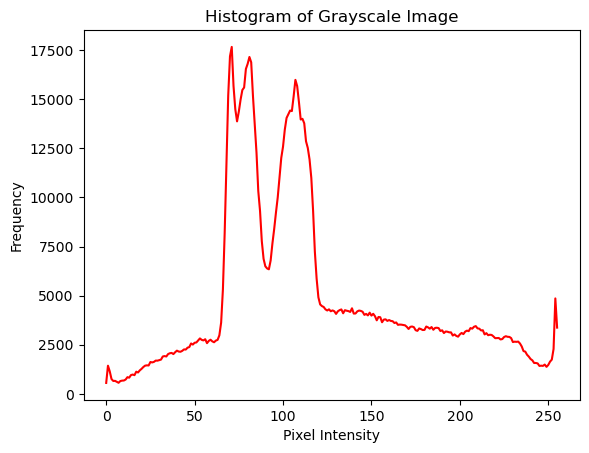

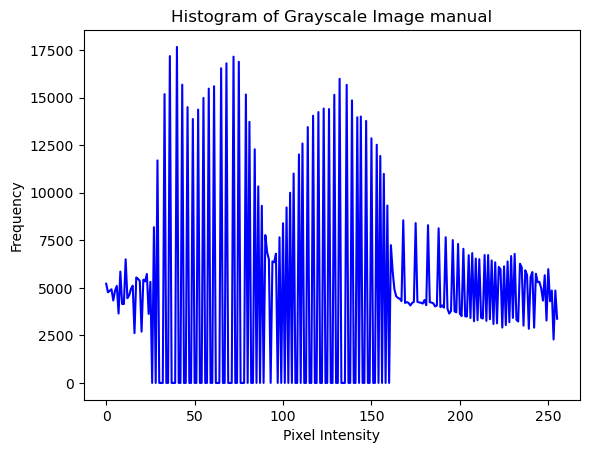

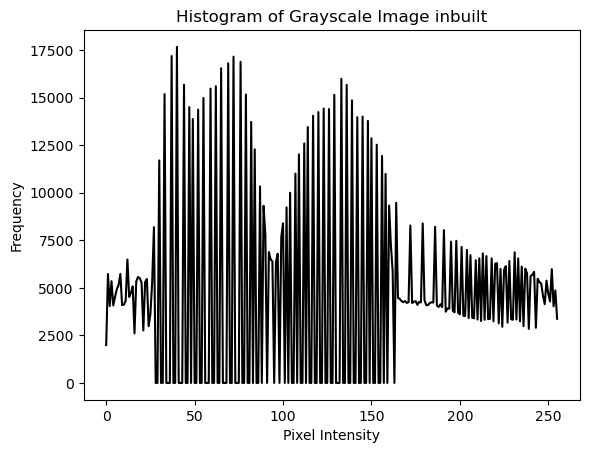

In [49]:
hist, bins = np.histogram(img_gy.flatten(), bins=256, range=(0, 256))
plt.plot(hist,color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
equalized_hist,_= np.histogram(equalized_image.flatten(), bins=256, range=(0, 256))
plt.plot(equalized_hist,color='blue')
plt.title("Histogram of Grayscale Image manual")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
eq_hist,_= np.histogram(img_eq.flatten(), bins=256, range=(0, 256))
plt.plot(eq_hist,color='black')
plt.title("Histogram of Grayscale Image inbuilt")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


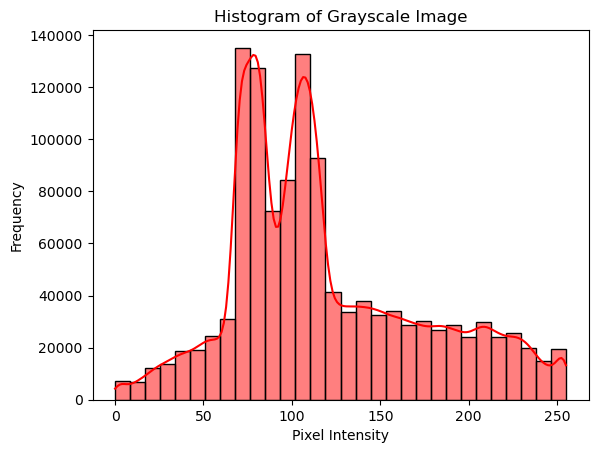

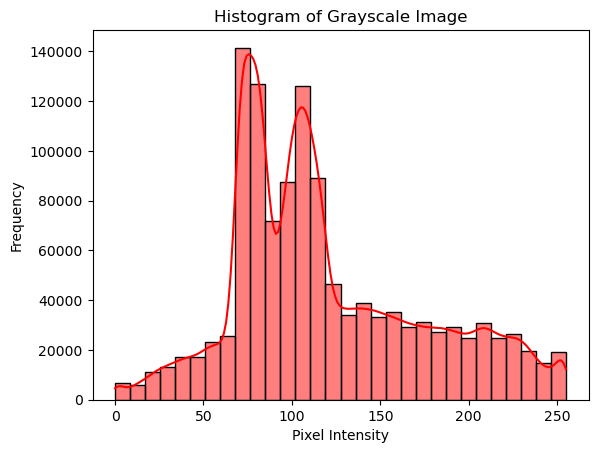

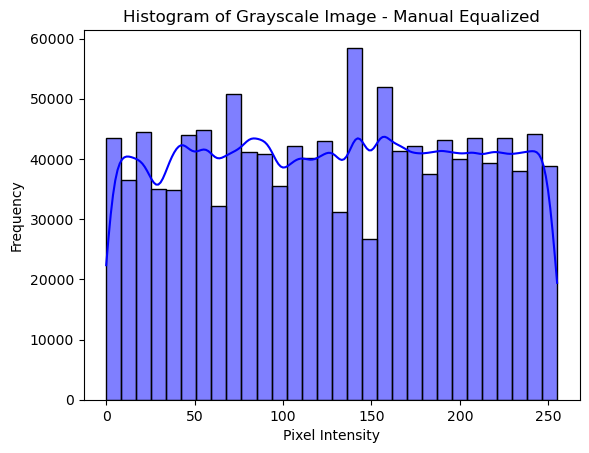

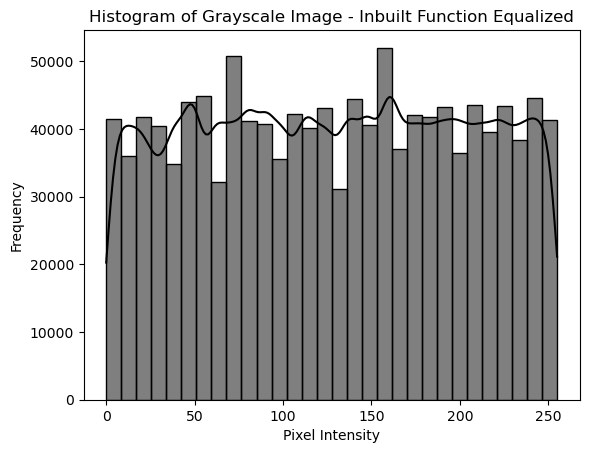

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.histplot(img_gy.ravel(), kde=True, bins=30, color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(gray_manual.ravel(), kde=True, bins=30, color='red')
plt.title("Histogram of Grayscale Image")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(equalized_image.ravel(), kde=True, bins=30, color='blue')
plt.title("Histogram of Grayscale Image - Manual Equalized")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


sns.histplot(img_eq.ravel(), kde=True, bins=30, color='black')
plt.title("Histogram of Grayscale Image - Inbuilt Function Equalized")
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
